In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import math
import re
from datetime import datetime
from datetime import timezone
import maya
from collections import Counter
from glob import glob
from ast import literal_eval
import sys
import json
import cProfile
import time
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from scipy import spatial

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

from scipy.spatial.distance import cosine

import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px

#%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
f = open("Simulation_Data11.txt").read().split("\n")
f

["['lru_c']",
 'big',
 '[-1, -1, 2000]',
 'True',
 '0.7',
 '0.38807036515135224',
 '-1.3403592719935036',
 '1.7511287825651618',
 '[251300.02]',
 '[34234.347432012495]',
 '[0.9886666666666667]',
 '[251300.0199999998]',
 "['lru_c']",
 '[25.648767948150635]',
 'a',
 'C',
 'A',
 '0',
 'True',
 '-1.2561338649144898',
 '-0.3940903794453946',
 'A',
 '',
 "['lru_c']",
 'big',
 '[-1, -1, 2000]',
 'True',
 '0.7',
 '-0.3150705116936925',
 '0.07638642529429418',
 '1.6314393943133463',
 '[251300.02]',
 '[34234.347432012495]',
 '[0.9886666666666667]',
 '[251300.0199999998]',
 "['lru_c']",
 '[25.57529330253601]',
 'a',
 'C',
 'A',
 '400',
 'True',
 '0',
 '0',
 'A',
 '',
 "['lru_c']",
 'big',
 '[-1, -1, 2000]',
 'True',
 '0.7',
 '-0.15053622292054514',
 '-0.8765179084568733',
 '1.841111143749692',
 '[251300.02]',
 '[34234.347432012495]',
 '[0.9886666666666667]',
 '[251300.0199999998]',
 "['lru_c']",
 '[25.588751792907715]',
 'b',
 'C',
 'A',
 '800',
 'True',
 '0.8011999330851141',
 '1.392591877040392

In [24]:
files, rowlen = [], []

files.append(open("Simulation_Data10.txt").read().split("\n"))
rowlen.append(22)
files.append(open("Simulation_Data11.txt").read().split("\n"))
rowlen.append(22)


df = pd.DataFrame(columns=['type', 'data', 'container size', 'cache size constraint', 'capacity', 'version', 
                           'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic', 'total_size', 
                           'total_time', 'hitrate', 'cache_size', 'names', 'runtime', 
                           'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe', 'lru_combine',
                           'xtra_size', 'xtra_time', 'cache_combine'])

for ijk in np.arange(len(files)):
    
    f = files[ijk]
    rl = rowlen[ijk]
    
    total_index = 0
    total_limit = len(f)

    while True:
        i = 0
        l1, l2, l3, l4 = [], [], [], []

        num_type = len(literal_eval(f[0]))
        while i < rl:

            # Constraints get a special case
            if i == 2:
                constraints = literal_eval(f[i])
                for j in np.arange(3):
                    val = constraints[j]
                    l1.append(val)
                    l2.append(val)
                    l3.append(val)
                    l4.append(val)
            # List format
            elif f[i][0] == '[':
                entry = literal_eval(f[i])

                l1.append(entry[0])
                if (num_type >= 2):
                    l2.append(entry[1])
                    if (num_type >= 3):
                        l3.append(entry[2])
                        if (num_type >= 4):
                            l4.append(entry[3])

            # Non-list format
            else:
                val = f[i]
                try:
                    val = float(val)
                except:
                    pass
                l1.append(val)
                l2.append(val)
                l3.append(val)
                l4.append(val)

            i += 1
            total_index += 1
        
        if rl == 14:
            l1.extend(["a", "", "", ""])
            l2.extend(["a", "", "", ""])
            l3.extend(["a", "", "", ""])
            l4.extend(["a", "", "", ""])

        s1 = pd.Series(l1, index = df.columns)
        df = df.append(s1, ignore_index=True)
        if (num_type >= 2):
            s2 = pd.Series(l2, index = df.columns)
            df = df.append(s2, ignore_index=True)
            if (num_type >= 3):
                s3 = pd.Series(l3, index = df.columns)
                df = df.append(s3, ignore_index=True)
                if (num_type >= 4):
                    s4 = pd.Series(l4, index = df.columns)
                    df = df.append(s4, ignore_index=True)

        if (total_index == total_limit):
            break
            

        while (f[i] == ''):
            i += 1
            total_index += 1
            if (total_index == total_limit):
                break

        if (total_index == total_limit):
            break

        f = f[i:]
    
df["runtime hrs"] = df["runtime"] / 60 / 60

df = df.drop_duplicates(subset=['type', 'data', 'container size', 'cache size constraint', 'capacity',
       'version', 'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic',
       'total_size', 'total_time', 'hitrate', 'cache_size', 'names',
       'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe', 'lru_combine',
        'xtra_size', 'xtra_time'])

df["protection"] = df["cache_safe"] / df["cache size constraint"]
xtra_list = ["xtra_vers", "xtra_stat1", "xtra_dynamic", "xtra_size", "xtra_time"]
df["stat_version"] = df.stat_version.where(df.xtra_stat1 != 0, "")
df["majority metric"] = df[xtra_list].idxmax(axis=1)


In [25]:
def conditions(df):
    if (df.xtra_vers == 0 and df.xtra_stat1 == 0 and df.xtra_dynamic == 0 and df.xtra_size == 0 and
         df.xtra_time == 0):
        return "None"
    else:
        return df["majority metric"]
    
df["majority metric"] = df.apply(conditions, axis=1)

In [26]:
df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
0,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,0.0,True,0.000000,0.000000,A,0.009554,0,None
1,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,400.0,True,0.000000,0.000000,A,0.009470,0.2,None
2,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,800.0,True,0.000000,0.000000,A,0.009399,0.4,None
3,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,1200.0,True,0.000000,0.000000,A,0.009527,0.6,None
4,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,1600.0,True,0.000000,0.000000,A,0.009458,0.8,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,lru_c,big,-1,4000,-1,True,0.7,0.522977,0.102495,0.477332,...,B,A,1600.0,True,0.230619,0.912588,A,0.014008,0.4,xtra_time
1427,lru_c,big,-1,4000,-1,True,0.7,0.920795,-1.349836,0.080199,...,A,A,2400.0,False,-1.391727,0.746070,A,0.015117,0.6,xtra_vers
1428,lru_c,big,-1,4000,-1,True,0.7,0.000000,0.000000,-0.122289,...,C,A,3200.0,True,0.548635,-1.368214,A,0.011887,0.8,xtra_size
1429,lru_c,big,-1,6000,-1,True,0.7,-0.672493,-0.573422,1.865667,...,C,A,0.0,False,-0.584462,1.902894,A,0.035148,0,xtra_time


# Functions

In [32]:
choice = "cache size constraint"

In [27]:
def run_plot(df, xd, yd, flds):
    # CREATE NEW COLUMN OF CONCATENATED VALUES
    df['_'.join(flds)] =  pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')

    # PLOT WITH hue
    sns.relplot(x=xd, y=yd, hue='_'.join(flds), data=df, aspect=1.5)
    plt.show()

    plt.clf()
    plt.close()

In [28]:
# 0s and 1s in xtras only
def binary_extra(vdf):
    vdf = vdf[(vdf["xtra_dynamic"] == 0) | (vdf["xtra_dynamic"] == 1)]
    vdf = vdf[(vdf["xtra_vers"] == 0) | (vdf["xtra_vers"] == 1)]
    vdf = vdf[(vdf["xtra_stat1"] == 0) | (vdf["xtra_stat1"] == 1)]
    return vdf
    
# xtra column is not 0
def nonzero_col(vdf, col):
    vdf = vdf[(vdf[col] != 0)]
    return vdf

# all xtra column is not 0
def no_xtra(vdf):
    for col in ["xtra_vers", "xtra_stat1", "xtra_dynamic", "xtra_size", "xtra_time"]:
        vdf = vdf[(vdf[col] == 0)]
    return vdf

def choose_xtra(df, a, b, c, d, e, f):
    return df[(df["xtra_vers"] == a) & (df["xtra_stat1"] == b) & (df["xtra_dynamic"] == c) & 
            (df["lru_combine"] == d) & (df["xtra_size"] == e) & (df["xtra_time"] == f)]

# base case of 0s
def add_zeros(vdf):
    pass

# filter cache_safe
def cache_safe(vdf, l):
    vdf = vdf[vdf["cache_safe"] == l[0]]
    for i in l[1:]:
        vdf = vdf.append(vdf[vdf["cache_safe"] == i])
    return vdf

In [29]:
stat_df = choose_xtra(df, 0, 0, 1, "False", 0, 0)
stat_df.head()

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
225,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,0.0,False,0.0,0.0,A,0.039112,0,xtra_dynamic
226,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,400.0,False,0.0,0.0,A,0.027370,0.2,xtra_dynamic
227,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,800.0,False,0.0,0.0,A,0.021897,0.4,xtra_dynamic
228,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,1200.0,False,0.0,0.0,A,0.018950,0.6,xtra_dynamic
229,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,1600.0,False,0.0,0.0,A,0.017093,0.8,xtra_dynamic


In [30]:
base_df = no_xtra(df)

In [31]:
base_df[base_df["capacity"] == 10].iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe


In [10]:
stat_df[stat_df["capacity"] == 10].iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe
35,lru_c,big,-1,-1,10,True,0.7,0.0,0.0,1.0,8698017.184,1.797164e+06,0.397467,1576.708,lru_c,119.140624,,C,A,0.0
36,lru_c,big,-1,-1,10,True,0.7,0.0,0.0,1.0,6578719.092,1.296309e+06,0.547783,2026.612,lru_c,92.472961,,C,A,2.0
37,lru_c,big,-1,-1,10,True,0.7,0.0,0.0,1.0,5177870.916,9.643788e+05,0.654800,4230.600,lru_c,75.084453,,C,A,4.0
38,lru_c,big,-1,-1,10,True,0.7,0.0,0.0,1.0,4315752.060,7.594544e+05,0.718767,4315.372,lru_c,64.442816,,C,A,6.0
39,lru_c,big,-1,-1,10,True,0.7,0.0,0.0,1.0,3761960.780,6.275184e+05,0.762033,4148.000,lru_c,57.354378,,C,A,8.0


In [52]:
cap_df = df[df["capacity"] == 35]

cap_df = cap_df[cap_df["total_size"] < 2000000]

cap_df = cap_df.replace({"xtra_vers":"Version", "xtra_stat1":"Popularity", "xtra_dynamic":"Dynamic Count",
                       "xtra_size":"Size", "xtra_time":"Time", "None":"Baseline LRU"})

fig = px.scatter_3d(x=cap_df["hitrate"],
                    y=cap_df["total_size"],
                    z=cap_df['total_time'],
                    size=cap_df["cache_size"],
                    color=cap_df["majority metric"],
                    labels={
                     "x": "Hitrate",
                    "y":"Total Size",
                        "z":"Total Time"
                     },
                    #symbol=cap_df["protection"].replace(0.0, "x").replace(0.2,"circle-open").replace(0.4, 'diamond-open').replace(0.6, 'square-open').replace(0.8, 'square'),
                    opacity=0.9,
)

fig.write_html("test.html")
plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')


fig.show()

<Figure size 432x288 with 0 Axes>

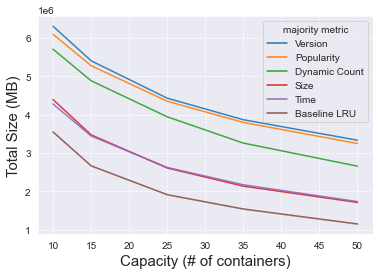

In [85]:
fdf = df[df["lru_combine"] == "False"]

adf = choose_xtra(fdf, 1, 0, 0, "False", 0, 0).groupby("capacity").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
bdf = choose_xtra(fdf, 0, 1, 0, "False", 0, 0).groupby("capacity").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
cdf = choose_xtra(fdf, 0, 0, 1, "False", 0, 0).groupby("capacity").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
ddf = choose_xtra(fdf, 0, 0, 0, "False", 1, 0).groupby("capacity").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
edf = choose_xtra(fdf, 0, 0, 0, "False", 0, 1).groupby("capacity").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
ndf = no_xtra(df)

abcdf = adf.append(bdf, ignore_index=True).append(cdf, ignore_index=True).append(ddf, ignore_index=True).append(edf, ignore_index=True).append(ndf, ignore_index=True)
abcdf = abcdf[abcdf["capacity"] != 5]
abcdef = abcdf.replace({"xtra_vers":"Version", "xtra_stat1":"Popularity", "xtra_dynamic":"Dynamic Count",
                       "xtra_size":"Size", "xtra_time":"Time", "None":"Baseline LRU"})
sns.set_style("dark")
p = sns.lineplot(x="capacity", y="total_size", hue="majority metric", data=abcdef, alpha=0.9)
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Capacity (# of containers)", fontsize = 15)
p.set_ylabel("Total Size (MB)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')
plt.savefig('demo_grid.png', transparent=True, bbox_inches='tight')





In [71]:
abcdf.groupby("majority metric").agg("mean")[["total_size", "total_time", "hitrate", "cache_size"]]

,total_size,total_time,hitrate,cache_size
majority metric,,,,
None,2.164566e+06,327959.961866,0.876000,9434.18480
xtra_dynamic,4.090461e+06,363271.498737,0.863543,7245.66240
xtra_size,2.864849e+06,327959.961866,0.876000,24301.83544
xtra_stat1,4.553560e+06,369301.677429,0.861690,14035.41328
xtra_time,2.850515e+06,320029.094498,0.879703,19742.99904
xtra_vers,4.668709e+06,371728.972053,0.860500,5800.55264


In [462]:
df[df["capacity"] == 10].sort_values(["total_size", "total_time", "hitrate"], ascending=[1,1,0]).head(40).iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe
965,lru_c,big,-1,-1,10,True,0.7,0.000000,0.417009,0.000000,3204261.000,571093.135832,0.778100,5639.128,lru_c,35.827400,b,C,A,0.0
429,lru_c,big,-1,-1,10,True,0.7,0.000000,0.000000,0.000000,3242296.304,553150.794283,0.792983,5796.320,lru_c,32.688348,,C,A,8.0
1206,lru_c,big,-1,-1,10,True,0.7,0.000000,-0.359623,0.000000,3324443.364,647147.282285,0.749033,8969.816,lru_c,39.103652,b,C,A,2.0
1118,lru_c,big,-1,-1,10,True,0.7,0.229001,1.486058,-0.795556,3380983.584,643659.041768,0.759483,9704.304,lru_c,64.727228,a,B,A,6.0
938,lru_c,big,-1,-1,10,True,0.7,-0.659572,0.633028,-0.372450,3485254.412,549646.188651,0.786867,4143.784,lru_c,59.079720,b,C,A,6.0
639,lru_c,big,-1,-1,10,True,0.7,0.977475,-0.294782,0.549259,3491996.348,589360.205226,0.776067,3983.752,lru_c,59.360268,a,C,A,8.0
1089,lru_c,big,-1,-1,10,True,0.7,0.055988,-0.251282,0.233329,3494899.192,598736.939827,0.775267,6837.452,lru_c,60.263986,b,C,A,8.0
1029,lru_c,big,-1,-1,10,True,0.7,-0.296631,-1.447633,1.037282,3499375.560,603349.488490,0.771383,6837.452,lru_c,58.296402,b,B,A,8.0
1149,lru_c,big,-1,-1,10,True,0.7,0.570411,-1.501380,0.911366,3544990.540,606574.294290,0.772350,6920.128,lru_c,54.777384,a,A,A,8.0
65,lru_c,big,-1,-1,10,True,0.7,0.000000,0.000000,0.000000,3550178.956,578975.469692,0.779983,3889.476,lru_c,28.673601,,C,A,0.0


In [25]:
val = []
kind = []
cap = []
base = []

base_df = no_xtra(df)[no_xtra(df)["protection"] == 0]

for i in [5,10,15,25,35,50]:
#for i in [10, 25, 50]:
    base_cap = base_df[base_df["capacity"] == i]
    val.append(1 - df[df["capacity"] == i].sort_values(["total_size"], ascending=True).iloc[0]["total_size"] / base_cap["total_size"].iloc[0])
    val.append(1 - df[df["capacity"] == i].sort_values(["total_time"], ascending=True).iloc[0]["total_time"] / base_cap["total_time"].iloc[0])
    val.append((df[df["capacity"] == i].sort_values(["hitrate"], ascending=False).iloc[0]["hitrate"] - base_cap["hitrate"].iloc[0]) / base_cap["hitrate"].iloc[0])
    kind.extend(["Total Size", "Total Time", "Hitrate"])
    cap.extend([i, i, i])
    
cap


[5, 5, 5, 10, 10, 10, 15, 15, 15, 25, 25, 25, 35, 35, 35, 50, 50, 50]

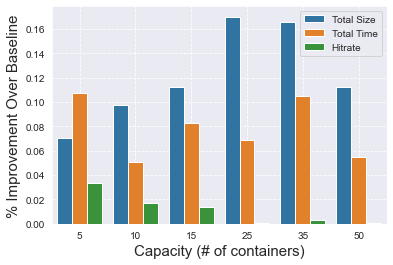

In [80]:
p = sns.barplot(x=cap, y=val, hue=kind)
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Capacity (# of containers)", fontsize = 15)
p.set_ylabel("% Improvement Over Baseline", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [31]:
pd.DataFrame(list(zip(cap, kind, val)), 
             columns=["Capacity", "Kind", "Value"]).groupby("Kind").agg("mean")

,Capacity,Value
Kind,,
Hitrate,23.333333,0.011557
Total Size,23.333333,0.121254
Total Time,23.333333,0.078293


In [32]:
ts, tt, hr, cs = [], [], [], []
for i in np.arange(6):
    tempdf = df.loc[[811, 938, 461, 497, 533, 1016]]
    ts.append(1 - tempdf.iloc[i]["total_size"] / base_df.iloc[i]["total_size"])
    tt.append(1 - tempdf.iloc[i]["total_time"] / base_df.iloc[i]["total_time"])
    hr.append((tempdf.iloc[i]["hitrate"] - base_df.iloc[i]["hitrate"]) / base_df.iloc[i]["hitrate"])
    if i == 3:
        cs.append(-0.03)
    else:
        cs.append(1 - tempdf.iloc[i]["cache_size"] / base_df.iloc[i]["cache_size"])
    print(tempdf.iloc[i]["cache_size"], base_df.iloc[i]["cache_size"])

3032.032 3154.524
4143.784 3889.4759999999997
5534.471999999999 5292.0199999999995
10523.616 8525.940000000002
12779.38 12286.035999999998
17411.651999999995 17177.451999999994


In [33]:
val_r = ts + tt + hr + cs
kind_r = []
for i in ["Total Size", "Total Time", "Hitrate", "Cache Size"]:
    kind_r.extend([i,i,i,i,i,i])
cap_r = []
for i in np.arange(4):
    cap_r.extend([5,10,15,25,35,50])

In [34]:
ts

[0.07046961302915367,
 0.01828768205903386,
 0.036158173273559524,
 0.05740961383070953,
 0.06605846489314382,
 0.0628833601490999]

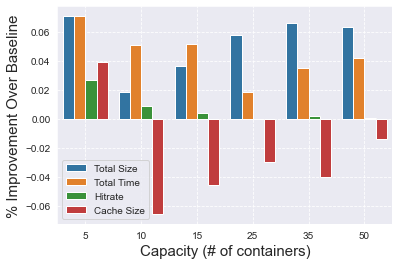

In [81]:

p = sns.barplot(x=cap_r, y=val_r, hue=kind_r)
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Capacity (# of containers)", fontsize = 15)
p.set_ylabel("% Improvement Over Baseline", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [468]:
np.average(ts), np.average(tt), np.average(hr), np.average(cs)

(0.05187781787245005,
 0.04463987656083077,
 0.007117660703990644,
 -0.026026113866883024)

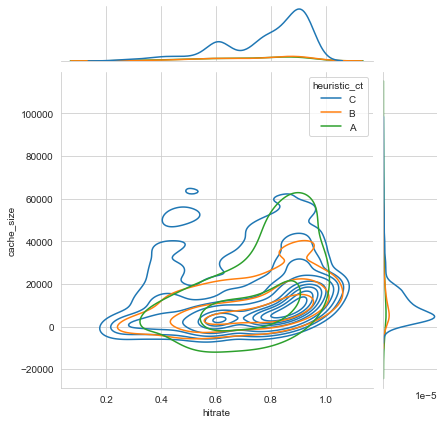

In [469]:
sns.jointplot(x="hitrate", y="cache_size", hue="heuristic_ct", data=df, kind="kde")

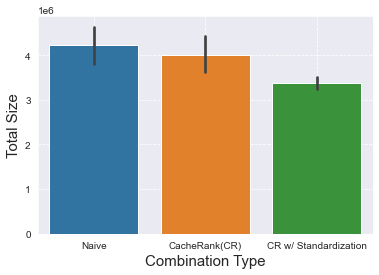

In [59]:
p = sns.barplot(x="heuristic_ct", y="total_size", data=df.sort_values(by="heuristic_ct").replace({"A":"Naive", "B":"CacheRank(CR)", "C":"CR w/ Standardization"}))
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Combination Type", fontsize = 15)
p.set_ylabel("Total Size", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

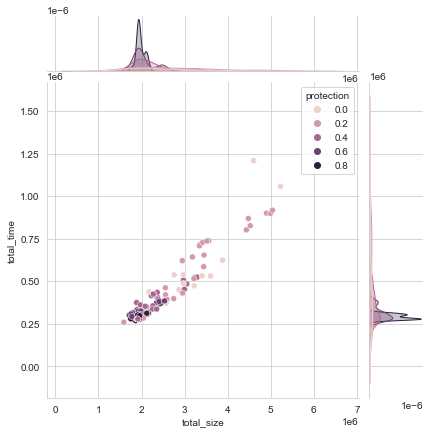

In [486]:
sns.jointplot(x="total_size", y="total_time", data=df[df["capacity"] == 25][df["total_size"] < 6000000], hue="protection")

In [61]:
ldf = pd.DataFrame()
for c in [5,10,15,25,35, 50]:
    ldf = ldf.append(df[df["capacity"] == c].sort_values("total_size").iloc[:50])

ldf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,stat_version,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,runtime hrs,protection,majority metric
811,lru_c,big,-1,-1,5,True,0.7,0.000000,-0.408898,-1.033879,...,a,B,A,1.0,True,0.000000,1.343792,0.022345,0.2,xtra_time
1083,lru_c,big,-1,-1,5,True,0.7,-0.349512,0.000000,-0.155288,...,,B,A,3.0,True,1.351778,0.000000,0.023730,0.6,xtra_size
631,lru_c,big,-1,-1,5,True,0.7,0.000000,-0.146680,0.000000,...,b,A,A,1.0,True,-0.189926,1.258326,0.013550,0.2,xtra_time
423,lru_c,big,-1,-1,5,True,0.7,0.000000,0.000000,0.000000,...,,C,A,3.0,False,0.000000,1.000000,0.012207,0.6,xtra_time
693,lru_c,big,-1,-1,5,True,0.7,1.219932,0.000000,-0.345946,...,,B,A,3.0,False,0.192941,2.283602,0.022531,0.6,xtra_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,lru_c,big,-1,-1,50,True,0.7,-1.868221,0.000000,0.233660,...,,C,A,0.0,True,0.491486,-0.015220,0.008313,0,xtra_size
687,lru_c,big,-1,-1,50,True,0.7,-0.642589,-0.157274,0.736373,...,b,C,A,20.0,True,0.281646,0.000000,0.009048,0.4,xtra_dynamic
1138,lru_c,big,-1,-1,50,True,0.7,-2.897970,0.000000,-0.953424,...,,C,A,30.0,False,1.012275,1.754619,0.008950,0.6,xtra_time
746,lru_c,big,-1,-1,50,True,0.7,0.369975,-0.481518,-0.488638,...,b,C,A,10.0,True,0.000000,0.000000,0.008553,0.2,xtra_vers


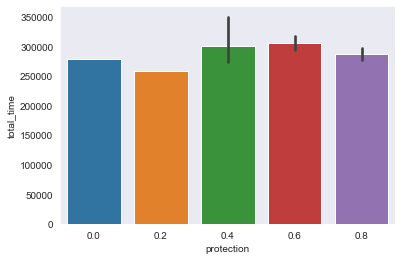

In [62]:
sns.barplot(x="protection", y="total_time", data=df[df["capacity"] == 25].sort_values("total_size").iloc[:20])

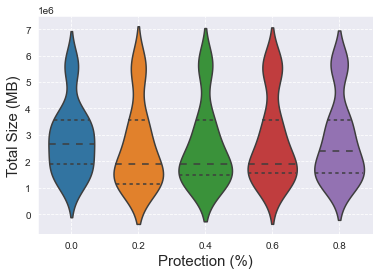

In [79]:
p = sns.violinplot(x="protection", y="total_size", data=ldf, inner="quartile", orient="v")
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Protection (%)", fontsize = 15)
p.set_ylabel("Total Size (MB)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

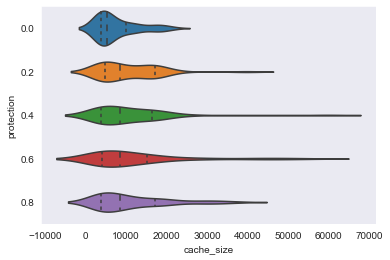

In [64]:
sns.violinplot(x="cache_size", y="protection", data=ldf, inner="quartile", orient="h")

In [540]:
sns.jointplot(x="total_size", y="total_size", hue="protection", data=ldf[ldf["total_size"]], kind="kde")

KeyError: "None of [Float64Index([ 5280903.256000001,  5384539.723999999, 5409110.6280000005,\n                       5425841.5,          5425841.5,        5430467.576,\n               5440152.368000001,        5444817.616,  5450634.492000001,\n               5489164.856000001,        5497151.856,        5501318.056,\n                     5510646.236,        5519263.624,        5578621.428,\n                     5672144.876,        5676490.536,        5681259.408,\n                     5681259.408,        5681259.408,          3204261.0,\n                     3242296.304,        3324443.364,        3380983.584,\n              3485254.4119999995,        3491996.348, 3494899.1920000003,\n              3499375.5600000005,         3544990.54, 3550178.9560000002,\n              3550178.9560000002, 3550178.9560000002, 3550178.9560000002,\n              3550178.9560000002, 3550178.9560000002, 3550178.9560000002,\n              3550178.9560000002, 3550178.9560000002, 3550178.9560000002,\n              3550178.9560000002,        2368362.992, 2379905.5519999997,\n              2418674.8640000005,        2437142.588, 2437704.2399999998,\n                     2461570.488,        2546522.244,        2570260.348,\n                     2596354.748, 2597710.2920000004,         2614695.58,\n              2636834.6240000003,          2654294.2,        2663543.768,\n              2664143.2040000004,        2666682.724,        2666682.724,\n                     2666682.724,        2666682.724,        2666682.724,\n                     1589024.312,        1713524.016,         1750367.36,\n                     1754587.544,         1776837.44,        1791439.972,\n              1797713.7319999998, 1804482.8080000002,         1865030.48,\n                     1882457.692, 1886004.0840000003,        1896112.424,\n              1910281.3760000002,        1910785.804, 1911431.1760000002,\n                     1912012.176,        1912864.004,        1914387.028,\n                     1914387.028,        1914387.028,          1285445.1,\n                     1357299.084,        1396524.176, 1396544.6439999999,\n                     1402318.412, 1406790.7240000002,        1411428.716,\n              1415062.5359999998, 1415062.5359999998,        1416982.132,\n                     1419063.408, 1439141.6639999999,        1440569.012,\n                     1465480.244,        1472785.416,         1480572.94,\n                      1482644.22,        1491860.852, 1496359.8360000001,\n                     1499704.516],\n             dtype='float64')] are in the [columns]"